In [2]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from tensorflow.keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from PIL import Image,ImageFile

In [3]:
resultPath = 'C:/Users/HP/Downloads/Results'
#train_folder = os.listdir(DATA_PATH).remove("New_Spam")

In [4]:
DATA_PATH = "C:/Users/HP/Downloads/spam_ph_ps/"
spamData=[]
label=[]
hashList=[]
count=-1
i = 0
for folder in os.listdir(DATA_PATH):
    print(">>>Reading ",folder)
    count+=1
    i = i+1
    if i <=2 :
        for file in os.listdir(DATA_PATH+folder):
            if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')or str(file).endswith('.PNG')or str(file).endswith('.png') or str(file).endswith('.bmp')or str(file).endswith('.BMP')):
                ImageFile.LOAD_TRUNCATED_IMAGES = True
                try:
                    img = image.imread(DATA_PATH+folder+'/'+file)
                except:
                    continue
                hsh = hash(tuple(np.array(img).flatten()))
                if(hsh not in hashList):
                    spamData.append(resize(img, (156, 156, 3)))
                    hashList.append(hsh)
                    label.append(count)
    else:
        for file in os.listdir(DATA_PATH+folder):
            if(str(file).endswith('.PNG')or str(file).endswith('.png') or str(file).endswith('.bmp')or str(file).endswith('.BMP')):
                ImageFile.LOAD_TRUNCATED_IMAGES = True
                try:
                    img = image.imread(DATA_PATH+folder+'/'+file)
                except:
                    continue
                hsh = hash(tuple(np.array(img).flatten()))
                if(hsh not in hashList):
                    spamData.append(resize(img, (156, 156, 3)))
                    hashList.append(hsh)
                    label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  personal_image_ham
>>>Reading  personal_image_spam
>>>Reading  spam_archive


In [5]:
print("Number of HAM",len(label[label==0]))
print("Number of SPAM",len(label[label==1]))
print("Number of SPAM_ar",len(label[label==2]))

Number of HAM 1519
Number of SPAM 1266
Number of SPAM_ar 3941


In [6]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (6726, 156, 156, 3)  Label shape :  (6726,)


In [7]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [8]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (4708, 156, 156, 3)  y_train shape :  (4708,)
x_test shape :  (2018, 156, 156, 3)  y_test shape :  (2018,)


In [9]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 1063
Number of train HAM 886
Number of test SPAM 456
Number of test HAM 380


In [10]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (4708, 3)  y_test_oh shape :  (2018, 3)


In [17]:
NO_OF_EPOCHS=10
BATCH_SIZE=128

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 156, 156, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 128)       73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 194688)           

In [18]:
#checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
#csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model.fit(x_train,y_train_oh,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.2)

Epoch 1/10
37/37 [==============================] - 76s 2s/step - loss: 1.6407 - accuracy: 0.5852 - val_loss: 0.6948 - val_accuracy: 0.6794
Epoch 2/10
37/37 [==============================] - 69s 2s/step - loss: 0.5690 - accuracy: 0.7613 - val_loss: 0.4208 - val_accuracy: 0.8340
Epoch 3/10
37/37 [==============================] - 78s 2s/step - loss: 0.3744 - accuracy: 0.8632 - val_loss: 0.3744 - val_accuracy: 0.8642
Epoch 4/10
37/37 [==============================] - 70s 2s/step - loss: 0.2935 - accuracy: 0.8934 - val_loss: 0.3475 - val_accuracy: 0.8608
Epoch 5/10
37/37 [==============================] - 68s 2s/step - loss: 0.2407 - accuracy: 0.9106 - val_loss: 0.3174 - val_accuracy: 0.8796
Epoch 6/10
37/37 [==============================] - 70s 2s/step - loss: 0.1976 - accuracy: 0.9314 - val_loss: 0.3622 - val_accuracy: 0.8875
Epoch 7/10
37/37 [==============================] - 70s 2s/step - loss: 0.1678 - accuracy: 0.9401 - val_loss: 0.3271 - val_accuracy: 0.8826
Epoch 8/10
37/37 [==

In [19]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

64/64 [==============================] - 7s 100ms/step


In [36]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


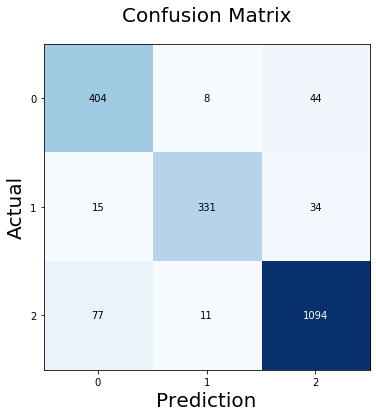

In [41]:
labels= ['HAM', 'SPAM', 'SPAM_ar']
cf = confusion_matrix(y_test_oh.argmax(axis = 1),y_pred.argmax(axis = 1))
fig, ax = plot_confusion_matrix(conf_mat=cf, figsize=(9, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [42]:
print(accuracy_score(y_test_oh,y_pred))
print(precision_score(y_test_oh,y_pred,average='weighted'))
print(recall_score(y_test_oh,y_pred,average='weighted'))
print(f1_score(y_test_oh,y_pred,average='weighted'))
#print(confusion_matrix(y_test_oh,y_pred))
print(classification_report(y_test_oh,y_pred))

0.902378592666006
0.9108641124772393
0.902378592666006
0.9061865774959323
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       456
           1       0.95      0.87      0.91       380
           2       0.93      0.93      0.93      1182

   micro avg       0.91      0.90      0.91      2018
   macro avg       0.90      0.89      0.89      2018
weighted avg       0.91      0.90      0.91      2018
 samples avg       0.90      0.90      0.90      2018



C:\Users\NITISH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [43]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(y_train),
                                                 y = y_train)
print(class_weights)

[1.47632487 1.77125658 0.56880512]


In [44]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(3,activation='softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 156, 156, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 78, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 39, 39, 128)       73856     
_________________________________________________________________
dropout_8 (Dropout)          (None, 39, 39, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 194688)           

In [45]:
#checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
#csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
#reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model1.fit(x_train,y_train_oh,epochs=NO_OF_EPOCHS,verbose=1,class_weights = class_weights,
           batch_size=BATCH_SIZE,validation_split = 0.2)

Epoch 1/10
37/37 [==============================] - 76s 2s/step - loss: 1.1947 - accuracy: 0.6349 - val_loss: 0.5781 - val_accuracy: 0.8033
Epoch 2/10
37/37 [==============================] - 72s 2s/step - loss: 0.4379 - accuracy: 0.8375 - val_loss: 0.3760 - val_accuracy: 0.8573
Epoch 3/10
37/37 [==============================] - 69s 2s/step - loss: 0.2972 - accuracy: 0.8879 - val_loss: 0.3355 - val_accuracy: 0.8776
Epoch 4/10
37/37 [==============================] - 69s 2s/step - loss: 0.2363 - accuracy: 0.9133 - val_loss: 0.3245 - val_accuracy: 0.8860
Epoch 5/10
37/37 [==============================] - 71s 2s/step - loss: 0.1733 - accuracy: 0.9420 - val_loss: 0.2964 - val_accuracy: 0.8959
Epoch 6/10
37/37 [==============================] - 70s 2s/step - loss: 0.1444 - accuracy: 0.9490 - val_loss: 0.3229 - val_accuracy: 0.9039
Epoch 7/10
37/37 [==============================] - 67s 2s/step - loss: 0.0993 - accuracy: 0.9681 - val_loss: 0.3478 - val_accuracy: 0.8940
Epoch 8/10
37/37 [==

In [46]:
prediction_prob = model1.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob)

64/64 [==============================] - 7s 105ms/step


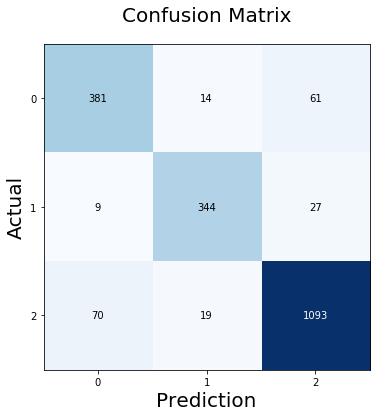

In [47]:
labels= ['HAM', 'SPAM', 'SPAM_ar']
cf = confusion_matrix(y_test_oh.argmax(axis = 1),y_pred.argmax(axis = 1))
fig, ax = plot_confusion_matrix(conf_mat=cf, figsize=(9, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [49]:
print(accuracy_score(y_test_oh,y_pred))
print(precision_score(y_test_oh,y_pred,average='weighted'))
print(recall_score(y_test_oh,y_pred,average='weighted'))
print(f1_score(y_test_oh,y_pred,average='weighted'))
#print(confusion_matrix(y_test_oh,y_pred))
print(classification_report(y_test_oh,y_pred))

0.8944499504459861
0.9041937003994218
0.8944499504459861
0.8992346932273748
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       456
           1       0.91      0.91      0.91       380
           2       0.93      0.92      0.93      1182

   micro avg       0.90      0.89      0.90      2018
   macro avg       0.89      0.88      0.89      2018
weighted avg       0.90      0.89      0.90      2018
 samples avg       0.89      0.89      0.89      2018



In [52]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense_4').output)
m2model = Model(inputs=model1.input,outputs=model1.get_layer('dense_8').output)

In [53]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)

m2_x_train = m2model.predict(x_train,verbose=1)
m2_x_test = m2model.predict(x_test,verbose=1)

64/64 [==============================] - 7s 110ms/step


In [54]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)
print("Shape of model2 Train and Test DF : ",m2_x_train.shape," : ",m2_x_test.shape)

Shape of model1 Train and Test DF :  (4708, 128)  :  (2018, 128)
Shape of model2 Train and Test DF :  (4708, 128)  :  (2018, 128)


In [55]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [58]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

DT = DecisionTreeClassifier()
DT.fit(m2_x_train, y_train)
CS_DTprob = DT.predict_proba(m2_x_test)
y_pred = DT.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.8909811694747275
Precision 0.8924948925402137
Recall :  0.8909811694747275
F1-score :  0.891551787765997
Confusion Matrix : 
[[ 387   24   45]
 [  13  332   35]
 [  81   22 1079]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       456
           1       0.88      0.87      0.88       380
           2       0.93      0.91      0.92      1182

    accuracy                           0.89      2018
   macro avg       0.87      0.88      0.87      2018
weighted avg       0.89      0.89      0.89      2018

cost-sensitive
Accuracy :  0.8845391476709613
Precision 0.8840613714804549
Recall :  0.8845391476709613
F1-score :  0.8842361944105096
Confusion Matrix : 
[[ 360   13   83]
 [  11  339   30]
 [  75   21 1086]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       456
           1       0.91      0.89      0.90       380
           2       0.91      0.92  

In [59]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

KNN = KNeighborsClassifier()
KNN.fit(m2_x_train, y_train)
CS_KNNprob = KNN.predict_proba(m2_x_test)
y_pred = KNN.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9117938553022795
Precision 0.913930776343422
Recall :  0.9117938553022795
F1-score :  0.9124819212916877
Confusion Matrix : 
[[ 404    5   47]
 [  13  346   21]
 [  75   17 1090]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       456
           1       0.94      0.91      0.93       380
           2       0.94      0.92      0.93      1182

    accuracy                           0.91      2018
   macro avg       0.90      0.91      0.90      2018
weighted avg       0.91      0.91      0.91      2018

cost-sensitive
Accuracy :  0.9033696729435085
Precision 0.90672529650597
Recall :  0.9033696729435085
F1-score :  0.9043987578817015
Confusion Matrix : 
[[ 402    8   46]
 [  14  344   22]
 [  88   17 1077]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       456
           1       0.93      0.91      0.92       380
           2       0.94      0.91    

In [60]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

GNB = GaussianNB()
GNB.fit(m2_x_train, y_train)
CS_GNBprob = GNB.predict_proba(m2_x_test)
y_pred = GNB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.8711595639246779
Precision 0.8754389173215109
Recall :  0.8711595639246779
F1-score :  0.871441157418556
Confusion Matrix : 
[[ 341   56   59]
 [  14  348   18]
 [  60   53 1069]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       456
           1       0.76      0.92      0.83       380
           2       0.93      0.90      0.92      1182

    accuracy                           0.87      2018
   macro avg       0.84      0.86      0.84      2018
weighted avg       0.88      0.87      0.87      2018

cost-sensitive
Accuracy :  0.8939544103072349
Precision 0.8970208070884306
Recall :  0.8939544103072349
F1-score :  0.8948071655653344
Confusion Matrix : 
[[ 383   30   43]
 [  12  352   16]
 [  82   31 1069]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       456
           1       0.85      0.93      0.89       380
           2       0.95      0.90  

In [61]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

AB = AdaBoostClassifier()
AB.fit(m2_x_train, y_train)
CS_ABprob = AB.predict_proba(m2_x_test)
y_pred = AB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.8954410307234886
Precision 0.8976056752387782
Recall :  0.8954410307234886
F1-score :  0.8960721712579647
Confusion Matrix : 
[[ 394   11   51]
 [  19  328   33]
 [  79   18 1085]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       456
           1       0.92      0.86      0.89       380
           2       0.93      0.92      0.92      1182

    accuracy                           0.90      2018
   macro avg       0.88      0.88      0.88      2018
weighted avg       0.90      0.90      0.90      2018

cost-sensitive
Accuracy :  0.900396432111001
Precision 0.9011176275203491
Recall :  0.900396432111001
F1-score :  0.9006969779478888
Confusion Matrix : 
[[ 385   14   57]
 [   9  343   28]
 [  76   17 1089]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       456
           1       0.92      0.90      0.91       380
           2       0.93      0.92   

In [62]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m2_x_train, y_train)
CS_LSVMprob = LSVM.predict_proba(m2_x_test)
y_pred = LSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.8979187314172448
Precision 0.900192296213126
Recall :  0.8979187314172448
F1-score :  0.8986966281319301
Confusion Matrix : 
[[ 394   19   43]
 [  13  340   27]
 [  83   21 1078]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       456
           1       0.89      0.89      0.89       380
           2       0.94      0.91      0.93      1182

    accuracy                           0.90      2018
   macro avg       0.88      0.89      0.88      2018
weighted avg       0.90      0.90      0.90      2018

cost-sensitive
Accuracy :  0.8979187314172448
Precision 0.8994269057508762
Recall :  0.8979187314172448
F1-score :  0.8984452539035216
Confusion Matrix : 
[[ 383   21   52]
 [  11  350   19]
 [  80   23 1079]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       456
           1       0.89      0.92      0.90       380
           2       0.94      0.91  